# Take-Home Exam 5: Decision Trees

*In this take-home exam, you are going to work with decision trees and observe how it performs with different hyperparameter settings.*

**Submission Instructions**

---
Copy this assignment to your Drive. <font color = 'red'> `File` --> `Save a copy in Drive`</font>. Rename it as <font color = 'green'>`Lastname_Firstname_th5`</font>.

Write your solutions in the cells  marked <font color = 'green'>`# your code`</font>.

When you're done please submit your solutions as an <font color="red">`.ipynb`</font> file. To do so:


1.  Click on <font color="red">`File`</font>  at the top left on the Colab screen, then click on <font color = 'red'>`Download .ipynb`</font>.
2.   Then submit the <font color="red">`.ipynb`</font> version of your work on SUCourse.


For any question, you may send an email to the TAs and LAs.

---

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path_prefix = "/content/drive/My Drive"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

%matplotlib inline

## Constructing a Decision Tree

A decision tree can be formulated as a regular tree structure in which nodes correspond to rules, condition checks and leaves correspond to prediction values. The construction process should be steered carefully. A tree that is grown without any constraint/limit may affect the performance drastically. In this exercise, you are going to train two different decision trees and observe how their classification boundaries change with respect to train data and then measure their performance on the test data.

To this end, you will be working with `data.csv` file that contains two features, namely `x` and `y`, and the target attribute `label`.

In [3]:
filename = "data.csv"
df = pd.read_csv(join(path_prefix, filename))
df.head()

,x,y,label
0,5.1,3.5,0.0
1,4.9,3.0,0.0
2,4.7,3.2,0.0
3,4.6,3.1,0.0
4,5.0,3.6,0.0


### Q1: Classification Boundaries

In this task, you will analyze how different hyperparameter settings affect the classification boundaries for decision trees. 

Below, you may find the function from the previous take-home exam to display the classification boundaries. However, the function is slightly changed. In addition to the previous parameters, it expects two more:

- `model` -> a model you generated
- `data` -> the feature set to train the `model` 
- `labels` -> corresponding label values 
- `ax` -> an axes object to plot the classification boundaries of the given model
- `title` -> the title of the given `ax` object

The function still trains the model, but you should also provide the data to be trained on. 

**Important:** The parameters `data` and `labels` should be numpy arrays, i.e. you should work with df[["x", "y"]].values which returns the numpy array of the specified columns.

---

1. Split the original data into two folds, namely *train* and *test*, in which 20% is reserved for the test data. Here, it's important that you **set the random_state parameter to 1** in train_test_split function.

2. Generate two different decision tree models. 

  - The first one should be generated with hyperparameter **`min_samples_leaf` set to 1**. `min_samples_leaf` is the minimum number of samples required to be at a leaf node. 

  - The second decision tree model should be initialized with **`min_samples_leaf` set to 5** and **`max_depth` set to 4**. `max_depth` hyperparameter controls the maximum depth of the tree.

3. Display the resulting classification boundaries in a **1x2 layout**. Utilize the axes titles to highlight the models.

  - Here, you should **put the train data as a parameter to the `visualize_model` function**, i.e. the function call should be visualize_model(model, x_train, y_train, ax, title).


Once you generate the boundaries, comment on the results. Disscuss the model performances with respect to generalizability, i.e. which model would perform better with unseen test data.

In [0]:
from matplotlib.colors import ListedColormap
from ipywidgets import interact

def visualize_model(model, data, labels, ax, title):
  step = 0.05

  cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
  cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

  model.fit(data, labels)

  x_min = data[:, 0].min() - 1
  x_max = data[:, 0].max() + 1
  y_min = data[:, 1].min() - 1
  y_max = data[:, 1].max() + 1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
  y_pred = model.predict(np.hstack([xx.reshape(-1,1), yy.reshape(-1,1)])).reshape(xx.shape)

  ax.pcolormesh(xx, yy, y_pred, cmap=cmap_light)
  ax.scatter(data[:, 0], data[:, 1], c=labels, cmap=cmap_bold, edgecolor='k', s=20)
  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_title(title)

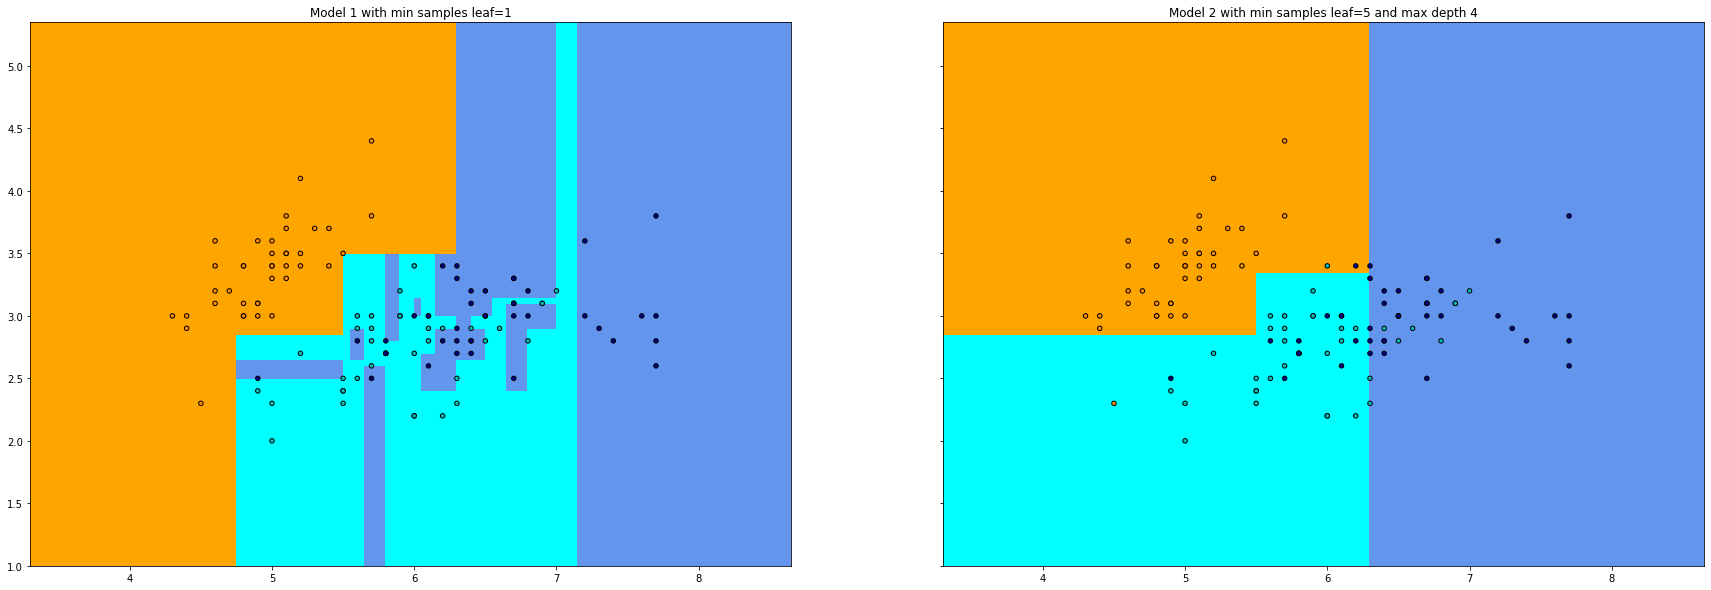

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import tree

X = df.drop("label", axis=1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)


model = tree.DecisionTreeClassifier(min_samples_leaf=1) 
model_2 = tree.DecisionTreeClassifier(min_samples_leaf=5, max_depth=4) 

fig, axs = plt.subplots(1, 2, figsize=(30, 10), sharey=True)
visualize_model(model, X_train.values, y_train.values, axs[0], "Model 1 with min samples leaf=1")
visualize_model(model_2, X_train.values, y_train.values, axs[1], "Model 2 with min samples leaf=5 and max depth 4")




<font color="blue">For the model 1, we see that boundaries are very specific. Light and dark blue regions are so interpenetrating.It is a very complex model. Wee see lots of small regions and very detailed boundary shapes. It is not generalizible, it seems like it is trained for a very specific data set, which is train data set here actually. It is overfitted, it is fitted so close to that specific data set, if you provide another data set to perform on, this model will probably fail because it will be very hard to categorize new datas given these complicated boundaries, it will be hard to adapt this model to perform on another data. But model 2 has more generalizable shape, meaning that its boundary shapes are more concrete.In other words, the boundaries are very distinct and differenciable. It is not that specific, it is not over-fitted.It does not closely shape/arrange its boundaries depending on training data. So that this model can perform well for another data sets as well, other than the set it is trained on. If you provide another data set, it will be easier to categorize new data because boundaries are not that complicated. Hence, model 2 will perform better with unseen test data.  </font>

### Q2: Model Performance

In the previous task, you performed a visual inspection on the decision tree models. Here, you are going to compare the performance with respect to the test data. And then solidify your findings with cross validation.

1. For both of the models, find the accuracy score on the train data. 
  - Here, the models are already trained with the train data. Measure the performance of the models on the train data.

2. For both of the models, find the accuracy score on the test data.

Once you extract the accuracy values, display the model performances' in a bar chart. An exemplary figure can be found below. 

<img height="300" widht="300" src="https://i.ibb.co/gjDm65z/gg.png"/>

Compare the models in terms of their performance on train and test data. Discuss the difference between the results. And try to explain the reason behind the difference.

For model with min samples leaf=1, accuracy on test data is:  0.7  and accuracy on train data is:  0.9416666666666667
For model with min samples leaf=5 and max depth 4, accuracy on test data is:  0.8333333333333334  and accuracy on train data is:  0.7916666666666666


Text(0.5, 0, 'accuracy')

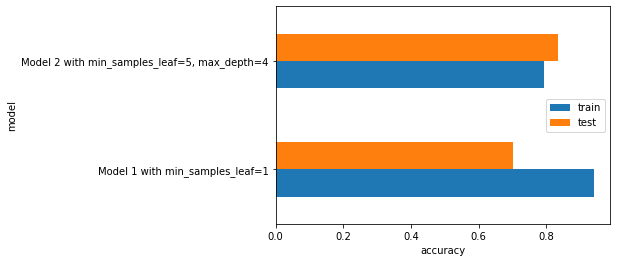

In [8]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_train)
accuracy_train1= accuracy_score(y_train, y_pred)

y_pred_t=model.predict(X_test)
accuracy_test1 = accuracy_score(y_test, y_pred_t)


y_pred = model_2.predict(X_train)
accuracy_train2 = accuracy_score(y_train, y_pred)

y_pred_t=model_2.predict(X_test)
accuracy_test2= accuracy_score(y_test, y_pred_t)

print("For model with min samples leaf=1, accuracy on test data is: ", accuracy_test1, " and accuracy on train data is: ", accuracy_train1 )
print("For model with min samples leaf=5 and max depth 4, accuracy on test data is: ", accuracy_test2, " and accuracy on train data is: ", accuracy_train2 )


train = [accuracy_train1, accuracy_train2]
test = [accuracy_test1, accuracy_test2]
index = ["Model 1 with min_samples_leaf=1", "Model 2 with min_samples_leaf=5, max_depth=4"]
df_n = pd.DataFrame({'train': train,'test': test}, index=index)
ax = df_n.plot.barh()

ax.set_ylabel('model')
ax.set_xlabel('accuracy')


<font color="blue">After printing out the accuracies for both models, we see that model 1 has more accuracy when performed on train data, and it is very high 94%. However, model 1 accuracy on test data is 70%. There is an significant difference between accuracy values. The reason behind is that model 1 is over-fitted. It is an overly complex model, dedicated to one data set only.This model is fitted so closely (almost exactly) to train data set and thereby, it wont be able to to fit/predict well on another data set which is test data set here. On the other hand, model 2 has less accuracy value compared to model1 when performed on train data set, which is 79.2%. Also, the difference between accuracy of performance on train and test data sets are close in the case of model 2. And interestingly the accuracy on test data set is (higher than train accuracy) 83 %. There is no difference between test and train accuracy as significant as the model 1 and model 2 performs better on test data set because model 2 is not over fitted. It is not fitted so closely to train data set because of the hyperparameter tuning. Setting min_samples_leaf to 5 makes sure that a leaf node cannot have less amount of sample than 5. Therefore, we make sure that model cannot overfit to training data set because it can't create so many small leafs containing one sample each, ending up with a very complex model. Similary, setting max depth to 4 also prevents fitting perfectly to training data, this way tree cannot grow deeper than 4 step. Less deep means less complex and less perfect fit. Hence, we come up with a better performance on test data.  </font>



### Q3: Cross Validation

Train-test splitting based model evaluations highly depend on the random splitting procedure. In order to evaluate your models in a more robust manner, you may apply cross validation.

Here, apply 10-Fold cross validation for both of the models and discuss the results.

1. Generate both of the models with the same set of hyperparameter settings.

2. Evalute your models with 10-Fold cross validation.

  - Here, you should be working with the original data. There is no need for the train/test folds.

Once you obtain the cross validation accuracy values, discuss the results. Which model is better and why? 

In [9]:
from sklearn.model_selection import cross_val_score


accuracies_of_model1 = cross_val_score(model, df.drop("label",  axis=1), df["label"], cv=10)
print ("Accuracies of model with min samples leaf=1:")
for i in range(10):
  print (accuracies_of_model1[i])
print("Mean accuracy of model 1=", np.mean(accuracies_of_model1))

print("\n")
accuracies_of_model2 = cross_val_score(model_2, df.drop("label",  axis=1), df["label"], cv=10)
print ("Accuracies of model with min samples leaf=5 and max_depth=4: ")
for i in range(10):
  print (accuracies_of_model2[i])
print("Mean accuracy of model 2=", np.mean(accuracies_of_model2))




Accuracies of model with min samples leaf=1:
0.5333333333333333
0.8
0.6666666666666666
0.7333333333333333
0.6666666666666666
0.5333333333333333
0.7333333333333333
0.6666666666666666
0.5333333333333333
0.7333333333333333
Mean accuracy of model 1= 0.6599999999999999


Accuracies of model with min samples leaf=5 and max_depth=4: 
0.6666666666666666
0.7333333333333333
0.8666666666666667
0.8
0.5333333333333333
0.6666666666666666
0.7333333333333333
0.7333333333333333
0.6
0.8666666666666667
Mean accuracy of model 2= 0.72


<font color="blue"> We see that average accuracy of model 2 (with min_samples_leaf=5 and depth=4 )is higher so, that model is better. The reason is it is not overfitted. When we do 10 fold cross validation, 9 folds are used for training and remainin 1 fold is used for testing. Model 1 tends to overfit because its hyperparameters are not tuned, I explained the roles of hyperparameter in Q2. So, model 1 creates a complex model by closely fitting to train data, it almost memorize the train data. Hence, it cannot perform well on another different dataset(test data for ex.) because it only likes training data let's say. When come across with another data it cannot adapt its complex model easily. Model 2 on contrary, doesnt tend to be overfitted thanks to its hyperparameters, it is not a complex model and it can perform well on another data set too, it can adapt easily. 